In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://www.ebay.com/b/White-Gold-Fine-Jewelry/4196/bn_2194911'

In [3]:
source = requests.get(url)

In [4]:
soup = BeautifulSoup(source.text, 'html.parser')

In [5]:
main_content = soup.find('ul', attrs={'class':'b-list__items_nofooter srp-results srp-grid'})

In [6]:
len(main_content)

144

In [7]:
items = main_content.find('div', attrs={'class':'s-item__details clearfix'})

In [8]:
product_list = []
for i in range(1,145):
    source = requests.get('https://www.ebay.com/b/White-Gold-Fine-Jewelry/4196/bn_2194911?_pgn={i}')
    for i in main_content.find_all('div', attrs = {'class': 's-item__info clearfix'}):
        product = i.find('h3', attrs={'class':'s-item__title'}).text.strip()
        info = i.find('span', attrs={'class': 's-item__price'}).text.strip()
        try:
            sold = i.find('span', attrs={'class':'NEGATIVE'}).text.strip()
        except:
            sold = 'none sold'
        products = {
            'product': product,
            'info': info,
            'amount sold': sold
        }
        
        product_list.append(products)

In [9]:
df_orig = pd.DataFrame(product_list)
df = df_orig.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      6912 non-null   object
 1   info         6912 non-null   object
 2   amount sold  6912 non-null   object
dtypes: object(3)
memory usage: 162.1+ KB


# Removing qoutes, dollar symbol, comma, white space, and text for the info and amount sold columns

In [11]:
df['info'] = df['info'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [12]:
df['amount sold'].unique()

array(['Only 2 left', '564 sold', '13 sold', '292 sold', 'none sold',
       '195 sold', '512 sold', '1,877 sold', 'Only 1 left!', '293 sold',
       '4 watching'], dtype=object)

In [13]:
df.drop(df.loc[df['amount sold'] == 'Only 2 left'].index, inplace=True)
df.drop(df.loc[df['amount sold'] == '4 watching'].index, inplace=True)
df.drop(df.loc[df['amount sold'] == 'Only 1 left!'].index, inplace=True)
df.drop(df.loc[df['amount sold'] == 'Benefits charity'].index, inplace=True)

In [14]:
df['amount sold'] = df['amount sold'].str.strip('')

In [15]:
df['amount sold'] = df['amount sold'].str.replace(',','')

In [16]:
df['amount sold'] = df['amount sold'].str.strip('sold').str.replace('none', '0')

In [17]:
df['amount sold'] = df['amount sold'].str.strip()

In [18]:
df['amount sold'].unique()

array(['564', '13', '292', '0', '195', '512', '1877', '293'], dtype=object)

In [19]:
df['amount sold'] = df['amount sold'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6192 entries, 1 to 6909
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      6192 non-null   object 
 1   info         6192 non-null   float64
 2   amount sold  6192 non-null   float64
dtypes: float64(2), object(1)
memory usage: 353.5+ KB


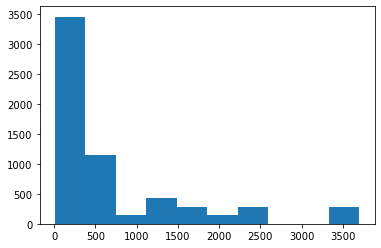

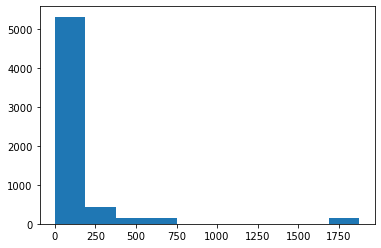

In [21]:
plt.hist(df['info'])
plt.show()
plt.hist(df['amount sold'])
plt.show()

# White Gold has been used as an alias for ivory

In [22]:
white_gold = df[df['product'].str.contains('White Gold')]

In [23]:
white_gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032 entries, 1 to 6909
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      4032 non-null   object 
 1   info         4032 non-null   float64
 2   amount sold  4032 non-null   float64
dtypes: float64(2), object(1)
memory usage: 126.0+ KB


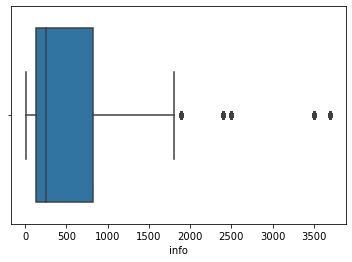

In [34]:
sns.boxplot(df['info'])
plt.show()

In [35]:
white_gold['product'].unique()

array(['1 ct Round Diamond Stud Earrings 14K White Gold (1 ct, I Color, I2-I3 Clarity)',
       '2 Ct Round Brilliant Cut Pendant 16+2 Solid 14k White Gold Solitaire Necklace',
       'Vintage 10k White Gold Emerald and Princes Cut Pink Sapphire & Diamond Ring SZ 7',
       'Brilliant Round 2.00 Carat Solitaire Diamond Earrings Stud Solid 14K White Gold',
       '1/2ct Real (Natural) Round Diamond Solitaire Stud Earring set in 14K White Gold',
       '14K White Gold Tanzanite & Diamond Anniversary Band',
       '18 Karat White Gold Sapphire, Ruby And Diamond Butterfly Ring',
       'Estate Gemstone Solid Gold Band Ring 14k White Gold 585 14kt Not Scrap 2.3gr 9',
       '(306) 18k White Gold filled Ring 7',
       'Aquamarine Diamond Ring 14K White Gold Fine Jewelry Halo Split Shank Size 6.5',
       '.88 CT Ruby And Diamond Ring In 18KT White Gold',
       '14k London Blue Topaz Yellow And White Gold Cocktail Ring',
       'Mint Green Garnet and Diamond Ring In 14KT White Gold',
      

In [36]:
natural = white_gold[white_gold['product'].str.contains('(Natural)')]

C:\Users\willi\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [29]:
white_gold.describe()

,info,amount sold
count,4032.000000,4032.000000
mean,715.168571,66.285714
std,980.818854,154.286031
min,9.990000,0.000000
25%,153.992500,0.000000
50%,248.500000,0.000000
75%,818.750000,0.000000
max,3700.000000,564.000000


In [33]:
natural.describe()

,info,amount sold
count,432.000000,432.000000
mean,2132.983333,170.666667
std,1454.351615,241.638951
min,198.950000,0.000000
25%,198.950000,0.000000
50%,2500.000000,0.000000
75%,3700.000000,512.000000
max,3700.000000,512.000000


In [32]:
outliers = white_gold[white_gold['info'] >= 1500 ]

In [37]:
natural_outliers = natural[natural['info'] >= 1500]

In [65]:
print(outliers['product'].unique())
print(outliers['info'].unique())

['.88 CT Ruby And Diamond Ring In 18KT White Gold'
 'Mint Green Garnet and Diamond Ring In 14KT White Gold'
 'Natural Trillion Cut Tanzanite Diamond White Gold WIDE Jewelry Ring 14Kt 4.00Ct'
 '5.11 Carat Natural Tanzanite 14K Solid White Gold Diamond Ring']
[1500. 3500. 2500. 3700.]


In [66]:
print(natural_outliers['product'].unique())
print(natural_outliers['info'].unique())

['Natural Trillion Cut Tanzanite Diamond White Gold WIDE Jewelry Ring 14Kt 4.00Ct'
 '5.11 Carat Natural Tanzanite 14K Solid White Gold Diamond Ring']
[2500. 3700.]


In [67]:


writer = pd.ExcelWriter('eBay_jewelry_analysis.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df.to_excel(writer, sheet_name='Sheet1')
white_gold.to_excel(writer, sheet_name='Sheet2')
natural.to_excel(writer, sheet_name='Sheet3')
outliers.to_excel(writer, sheet_name='Sheet3')
natural_outliers.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()